# Contents
## Import libraries and data
## Create subset of data
## Create clusters
## Define and apply kmeans
## Plot visualizations
## Calculate descriptive statistics for clusters

## Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\Andrew\Desktop\Data project'

In [5]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

### Make sure data does not have outliers

In [6]:
citi22.loc[citi22['trip_mins'] > 1200, 'outliers'] = 'excluded'
citi22.loc[(citi22['trip_mins'] <= 1200) & (citi22['trip_mins'] >= 0) , 'outliers'] = 'included'
citi22.loc[citi22['trip_mins'] < 0, 'outliers'] = 'excluded'

In [7]:
citi22_inc = citi22[citi22.outliers == 'included']

In [8]:
## export
citi22_inc.to_csv(os.path.join(path, '02 Data','clean', 'citi22_inc.csv'), index = False)

## Create subset of data

In [9]:
np.random.seed(4)
dev = np.random.rand(len(citi22_inc)) <= 0.99

In [10]:

big = citi22_inc[dev]
small = citi22_inc[~dev]

In [11]:
len(big) + len(small)

891975

In [12]:
citi22_inc.shape

(891975, 21)

In [13]:
citi22_small = small[['member_type', 'start hour', 'start day', 'weekday', 'month', 'trip_mins', 'start_station_frequency', 'end_station_frequency']]
citi22_big = big[['member_type', 'start hour', 'start day', 'weekday', 'month', 'trip_mins', 'start_station_frequency', 'end_station_frequency']]

In [14]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,outliers
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,included
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,included
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,included
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,included
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,included


## Create clusters

In [15]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(citi22_small).score(citi22_small) for i in range(len(kmeans))]

score

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\

[-1807392416114.612,
 -1142797328372.0967,
 -544186245587.98206,
 -391968725953.17145,
 -323347816116.2871,
 -272090353458.7221,
 -230028816163.65723,
 -196783692383.6975,
 -164081659442.80923]

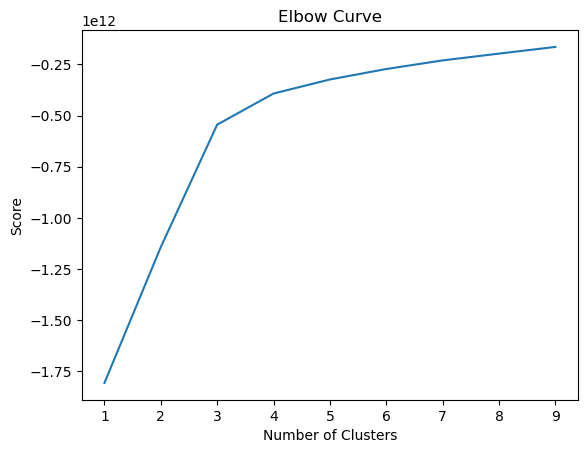

In [17]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Curve starts to flatten around 3

## Define and apply kmeans

In [18]:
kmeans = KMeans(n_clusters = 4) 

In [19]:
kmeans.fit(citi22_small)

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [20]:
citi22_small['cluster'] = kmeans.fit_predict(citi22_small)

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Andrew\AppData\Local\Temp\ipykernel_8252\1508594382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi22_small['cluster'] = kmeans.fit_predict(citi22_small)


In [21]:
citi22_small.head()

,member_type,start hour,start day,weekday,month,trip_mins,start_station_frequency,end_station_frequency,cluster
149,0,13,23,6,1,14.63,42455,3770,1
543,0,11,18,1,1,26.13,9439,9623,3
564,1,17,25,1,1,6.25,9439,10665,3
629,1,21,14,4,1,4.07,10583,14617,0
632,1,17,28,4,1,13.67,42455,14617,1


In [22]:
citi22_small['cluster'].value_counts()

3    3421
0    2975
1    1332
2    1330
Name: cluster, dtype: int64

## Plot visualizations

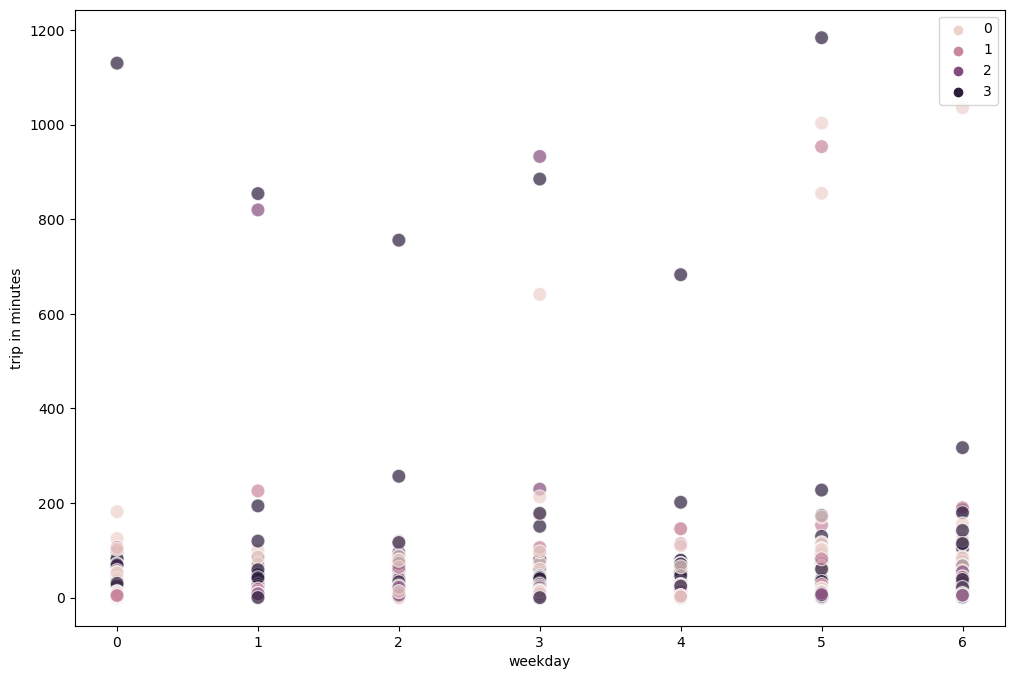

In [32]:
plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=citi22_small['weekday'], y=citi22_small['trip_mins'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax1.grid(False)
plt.xlabel('weekday')
plt.ylabel('trip in minutes')
plt.show()

In [33]:
ax1 = ax1.figure
ax1.savefig(os.path.join(path, '04 Analysis', 'cluster_weekday.png'))

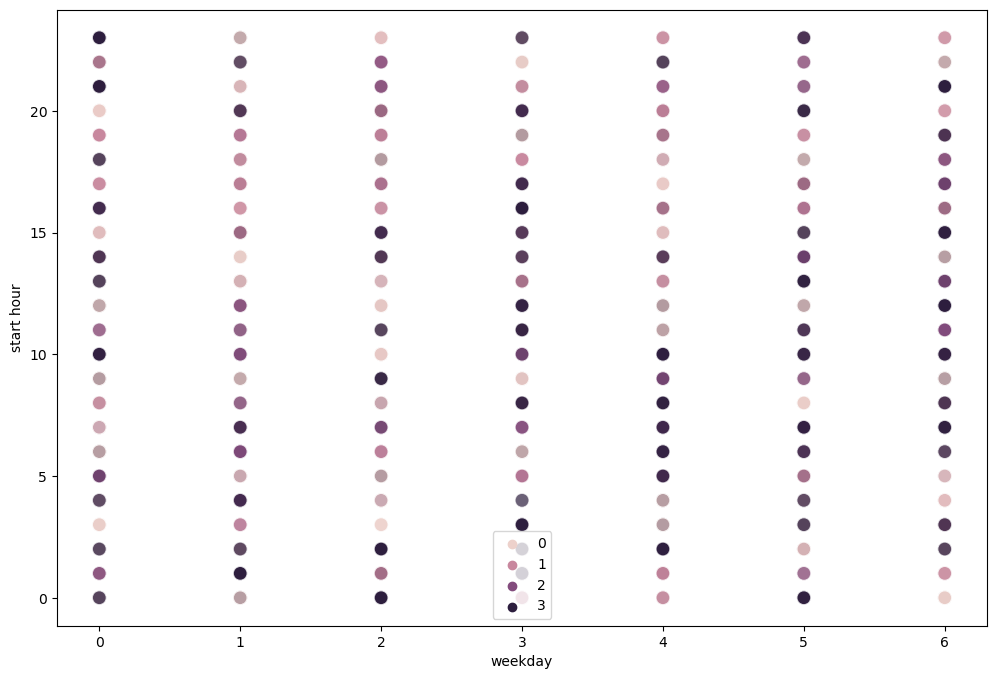

In [24]:
plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=citi22_small['weekday'], y=citi22_small['start hour'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2.grid(False)
plt.xlabel('weekday')
plt.ylabel('start hour')
plt.show()

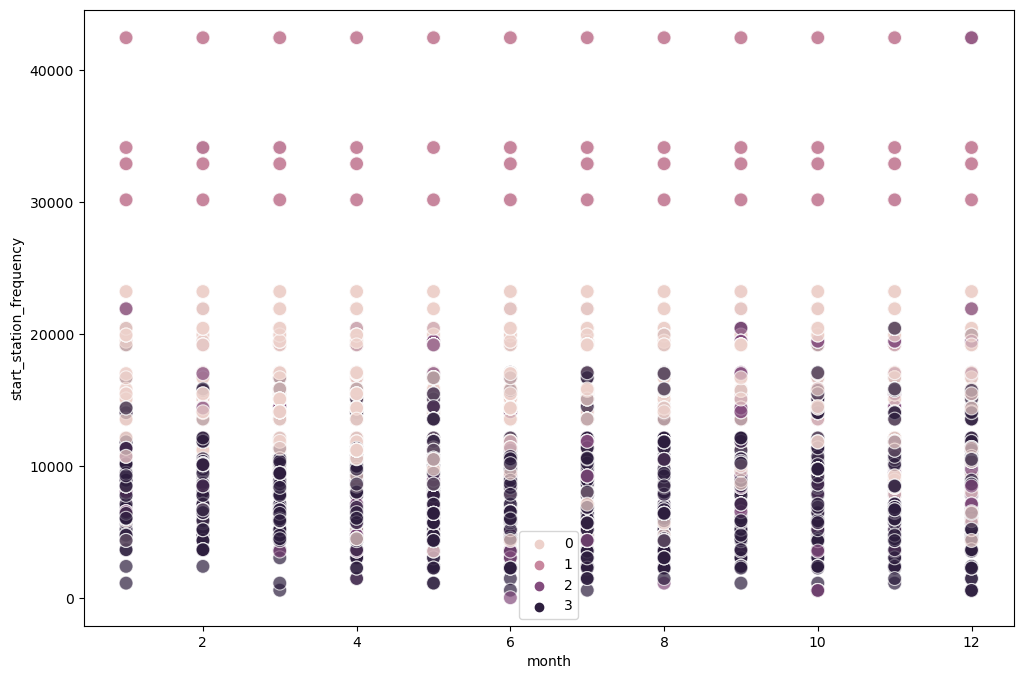

In [25]:
plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=citi22_small['month'], y=citi22_small['start_station_frequency'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2.grid(False)
plt.xlabel('month')
plt.ylabel('start_station_frequency')
plt.show()

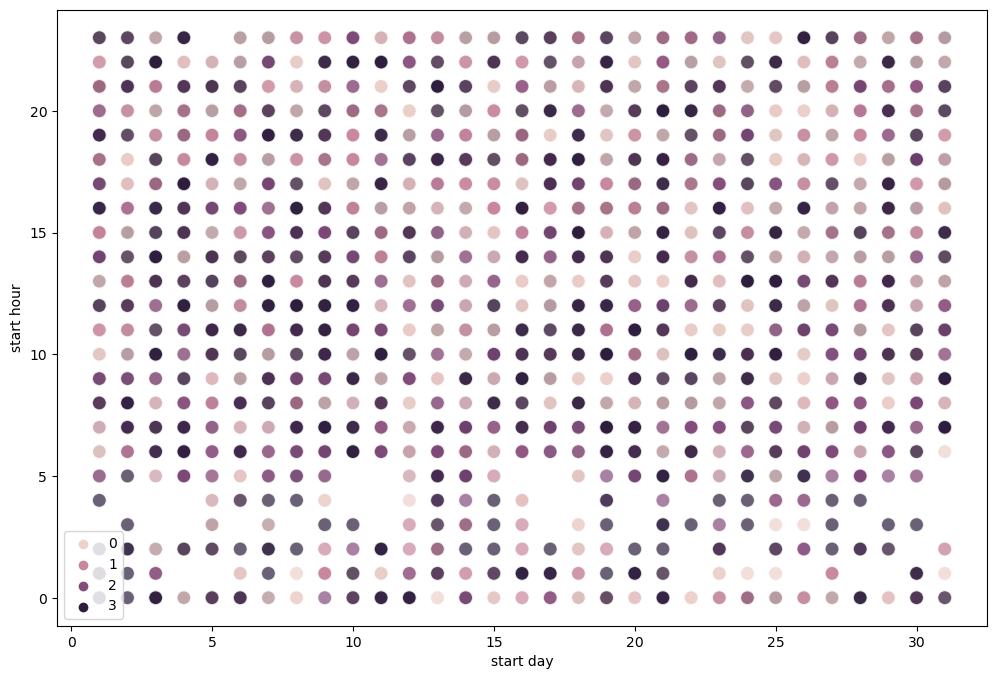

In [26]:
plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=citi22_small['start day'], y=citi22_small['start hour'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2.grid(False)
plt.xlabel('start day')
plt.ylabel('start hour')
plt.show()

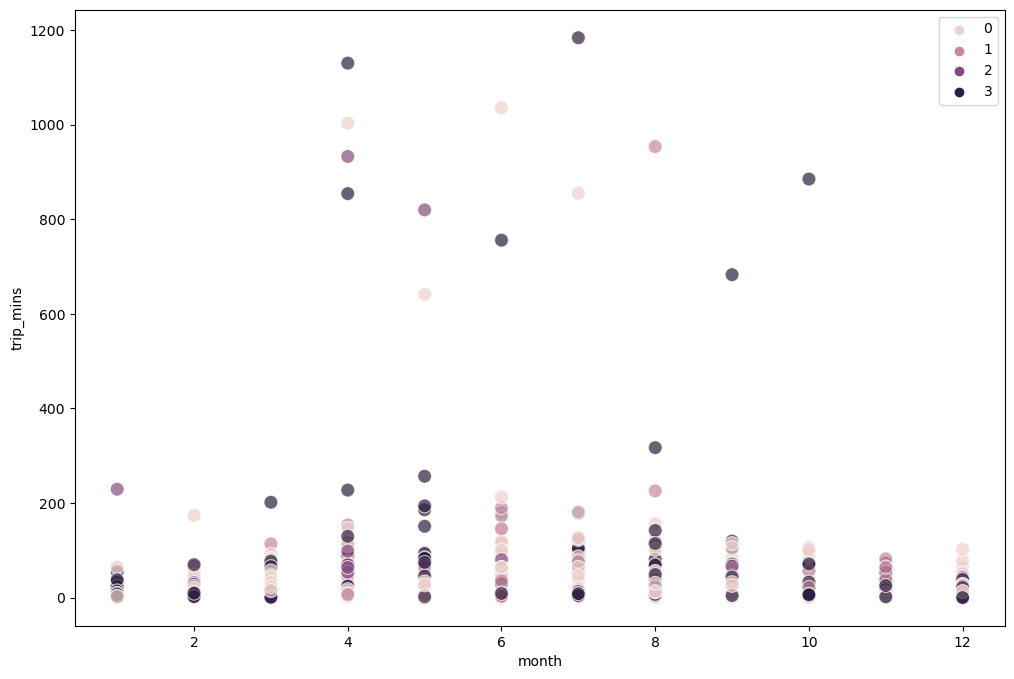

In [27]:
plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=citi22_small['month'], y=citi22_small['trip_mins'], hue=kmeans.labels_, s=100, alpha=0.7) 

ax2.grid(False)
plt.xlabel('month')
plt.ylabel('trip_mins')
plt.show()

In [31]:
ax2 = ax2.figure
ax2.savefig(os.path.join(path, '04 Analysis', 'cluster_month.png'))

### The closest tie I can make is that its taking into account the startion and station frequencies and using that to group.

## Calculate descriptive statistics for clusters

In [90]:
citi22_small.loc[citi22_small['cluster'] == 3, 'cluster_group'] = 'dark purple'
citi22_small.loc[citi22_small['cluster'] == 2, 'cluster_group'] = 'purple'
citi22_small.loc[citi22_small['cluster'] == 1, 'cluster_group'] = 'pink'
citi22_small.loc[citi22_small['cluster'] == 0, 'cluster_group'] = 'light pink'

C:\Users\Andrew\AppData\Local\Temp\ipykernel_23440\536690977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi22_small.loc[citi22_small['cluster'] == 3, 'cluster_group'] = 'dark purple'


In [95]:
citi22_small.groupby('cluster').agg({'start day':['mean', 'median', 'min', 'max'], 
                        'start hour':['mean', 'median', 'min', 'max'],
                         'month':['mean', 'median', 'min', 'max'],
                        'trip_mins':['mean', 'median', 'min', 'max'],
                        'start_station_frequency':['mean', 'median', 'min', 'max'],
                        'end_station_frequency':['mean', 'median', 'min', 'max']})

start day                start hour                    month         \
              mean median min max       mean median min max      mean median   
cluster                                                                        
0        16.001502   16.0   1  31  15.349850   17.0   0  23  7.249249    7.0   
1        15.360150   15.0   1  31  12.853383   13.0   0  23  7.205263    7.0   
2        16.014118   16.0   1  31  14.565378   16.0   0  23  7.115294    7.0   
3        16.049401   16.0   1  31  14.194972   15.0   0  23  7.201111    7.0   

         ... trip_mins          start_station_frequency                  \
         ...       min      max                    mean   median    min   
cluster  ...                                                              
0        ...      0.88   953.47            35936.307808  34130.0  30165   
1        ...      0.03   932.67            13980.585714  11819.0      2   
2        ...      0.02  1035.70            15823.128739  15828.0   2379   
3        ...      0.00  1183.60             9470.006139   9642.0    553   

               end_station_frequency                         
           max                  mean   median    min    max  
cluster                                                      
0        42455          13136.015015  11830.0    609  32417  
1        42455          36368.707519  34750.0  30220  44730  
2        23214          16353.043025  15880.0   3759  23591  
3        21907           8916.723473   9260.0      1  19858  

[4 rows x 24 columns]

### As we assumed the big differentiating factors seem to be the start and end station frequencies